In [235]:
#Import Dependancies

import pandas as pd
import csv
import numpy as np

# Import SQL Alchemy
from sqlalchemy import create_engine, MetaData

# Import the method used for connecting to DBs
from sqlalchemy import create_engine
from sqlalchemy import func
from sqlalchemy import desc
 
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.sql import select
from sqlalchemy.orm import Session

#Import Matplotlib
import matplotlib
import matplotlib.pyplot as plt
#import matplotlib.axes as ax

In [69]:
# Creates a connection to the DB using the MySQL Connect Engine
engine = create_engine("sqlite:///hawaii.sqlite")
conn = engine.connect()

#Delcare a Base
Base = automap_base()

#Use the Base class to reflect the database tables
Base.prepare(engine, reflect = True)

Base.classes.keys()
#Base.metadata.tables
 

['measurement', 'station']

In [70]:

# Create a Session Object to Connect to DB
# ----------------------------------
# Session is a temporary binding to our DB
from sqlalchemy.orm import Session
session = Session(engine)

#Assign classes to variables
    
Measurement = Base.classes.measurement
Station = Base.classes.station

In [220]:
import datetime as dt
twelve_months=session.query(func.max(Measurement.date)).\
        group_by(func.strftime("%Y-%m",Measurement.date)).\
        order_by(desc(func.strftime("%Y-%m",Measurement.date)))\
        .limit(13).all()
        

min_date = twelve_months[-1]

month_prcp = session.query(Measurement.date,func.sum(Measurement.prcp)).\
            filter(Measurement.date > '2016-08-31').\
            group_by(Measurement.date).\
            order_by(Measurement.date).all()
month_prcp
date_prcp_df=pd.DataFrame(month_prcp,columns=['Date','Precipitation'])
date_prcp_df.set_index('Date',inplace=True)
date_prcp_df.head()

,Precipitation
Date,
2016-09-01,0.03
2016-09-02,0.25
2016-09-03,1.27
2016-09-04,1.38
2016-09-05,0.34


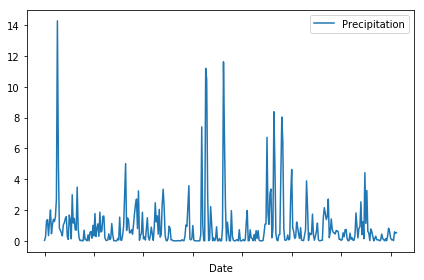

In [239]:
#Plot the last 12 months of precipitation data in a Matplotlib chart

date_prcp_df.plot()

plt.tight_layout()
plt.show()

In [222]:
# Use the session to query calculate the total number of stations
sel=session.query(Station.station).count()
print("Total number of Stations: ",sel)


Total number of Stations:  9


In [223]:
#List the Stations and Observation Counts
stations=session.query (Measurement.station,func.count(Measurement.tobs)).\
        group_by(Measurement.station).\
        order_by (desc(Measurement.station))\
        .all()
stations

[('USC00519523', 2669),
 ('USC00519397', 2724),
 ('USC00519281', 2772),
 ('USC00518838', 511),
 ('USC00517948', 1372),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00513117', 2709),
 ('USC00511918', 1979)]

In [224]:
#List the Station with the highest number of observations
most_active = session.query (Measurement.station,func.count(Measurement.tobs)).\
        group_by(Measurement.station).\
        order_by (desc(Measurement.station)).limit(1).all()
print("Most active Station: ",most_active)

Most active Station:  [('USC00519523', 2669)]


In [247]:
#Retrieve  the last 12 Months of temperature observations
twelve_months_tobs = session.query(Measurement.date,func.sum(Measurement.tobs)).\
            filter(Measurement.station == 'USC00519523').\
            filter(Measurement.date > '2016-08-31').\
            group_by(Measurement.date).\
            order_by(Measurement.date).all()

twelve_months_tobs_df=pd.DataFrame(month_prcp,columns=['Date','TOBS'])
twelve_months_tobs_df.set_index('Date',inplace=True)
twelve_months_tobs_df.head()

,TOBS
Date,
2016-09-01,0.03
2016-09-02,0.25
2016-09-03,1.27
2016-09-04,1.38
2016-09-05,0.34


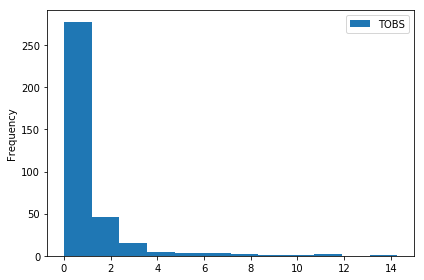

In [226]:
#Plot the last 12 months of station observation data in a Matplotlib chart

twelve_months_tobs_df.plot.hist(bins=12)
plt.tight_layout()
plt.show()

In [233]:
def calc_temps(startdt,enddt):
    temps=session.query(Measurement.date).\
            filter(Measurement.date >= startdt).\
            filter(Measurement.date <= enddt).\
            order_by(Measurement.date).all()
    print (temps)

    calc_temps(2015-8-1,2016-9-1)    

In [255]:
temps = session.query(Measurement.date,func.sum(Measurement.tobs)).\
   filter(Measurement.date >= '2017-01-01').\
    filter(Measurement.date <= '2017-12-31').\
    group_by(Measurement.date).\
    order_by(Measurement.date).all()

temps
temps_df=pd.DataFrame(month_prcp,columns=['Date','TOBS'])
temps_df.set_index('Date',inplace=True)
temps_df.to_dict()




{'TOBS': {'2016-09-01': 0.03,
  '2016-09-02': 0.25,
  '2016-09-03': 1.27,
  '2016-09-04': 1.3800000000000001,
  '2016-09-05': 0.33999999999999997,
  '2016-09-06': 1.23,
  '2016-09-07': 2.0,
  '2016-09-08': 0.4600000000000001,
  '2016-09-09': 1.0699999999999998,
  '2016-09-10': 1.4,
  '2016-09-11': 1.25,
  '2016-09-12': 1.54,
  '2016-09-13': 2.71,
  '2016-09-14': 14.280000000000001,
  '2016-09-15': 4.96,
  '2016-09-16': 0.8200000000000001,
  '2016-09-17': 0.6799999999999999,
  '2016-09-18': 0.53,
  '2016-09-19': 0.32,
  '2016-09-20': 1.03,
  '2016-09-21': 1.17,
  '2016-09-22': 1.44,
  '2016-09-23': 1.57,
  '2016-09-24': 0.28,
  '2016-09-25': 0.09,
  '2016-09-26': 1.67,
  '2016-09-27': 1.3599999999999999,
  '2016-09-28': 0.13,
  '2016-09-29': 2.99,
  '2016-09-30': 1.15,
  '2016-10-01': 1.4500000000000002,
  '2016-10-02': 0.72,
  '2016-10-03': 0.6900000000000001,
  '2016-10-04': 3.4899999999999998,
  '2016-10-05': 0.8200000000000001,
  '2016-10-06': 0.16,
  '2016-10-07': 0.01,
  '2016-10-